In [24]:
# Load packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
# Step 1 Load dataset

train = pd.read_csv('/content/train.csv')
print(train.shape)
train.head()


(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# step 3:

test = pd.read_csv('/content/test.csv')
print(test.shape)
test.head()


(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
Y_train = train['label']

X_train = train.drop(labels=['label'], axis=1)

In [10]:
train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

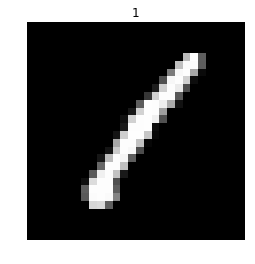 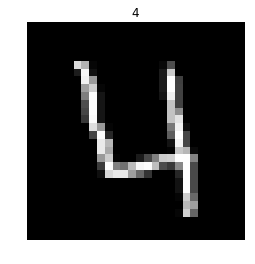

In [28]:
# normalization :

X_train = X_train / 255.0
test = test / 255.0
print('X train data shape: ', X_train.shape)
print('test data shape:' , test.shape)

X train data shape:  (42000, 784)
test data shape: (28000, 784)


In [29]:
# reshape the data:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

print('X_train shape:', X_train.shape)
print('test shape:', test.shape)

X_train shape: (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


In [30]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 10)


In [31]:
#split the data
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


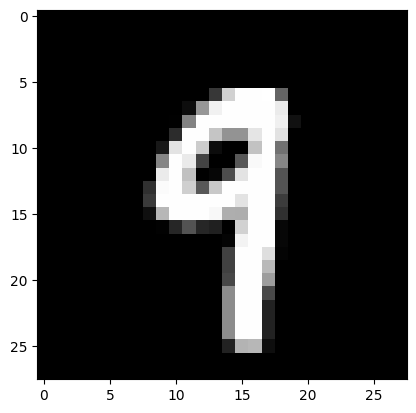

In [32]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

**CNN**
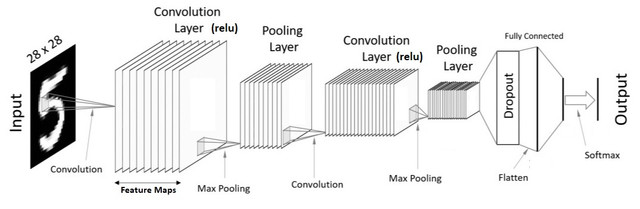

CNN:
1. input layer
2. Counvolution layer
3. Pooling layer
4. Fully connected layer
5. output layer

**Counvolution layer**

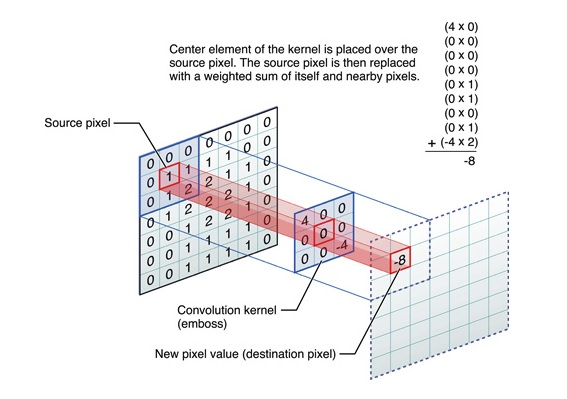


# activtion funcation used in Convolution layer is ReLU

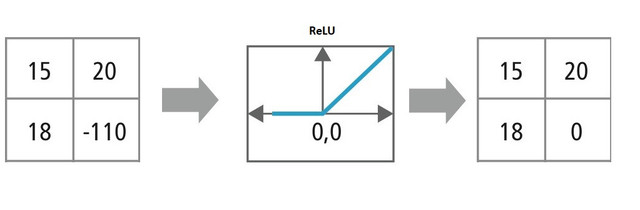

**Same Padding**

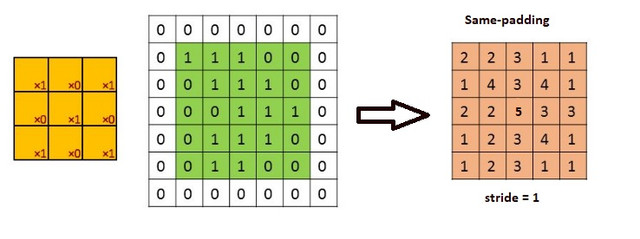

**Max Pooling**

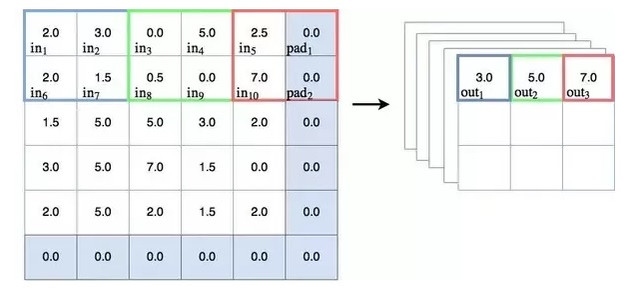

**Flattening**


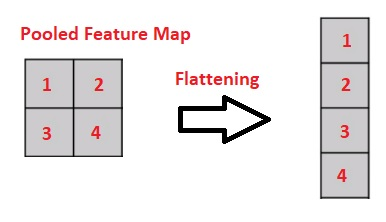

**Full Connection**

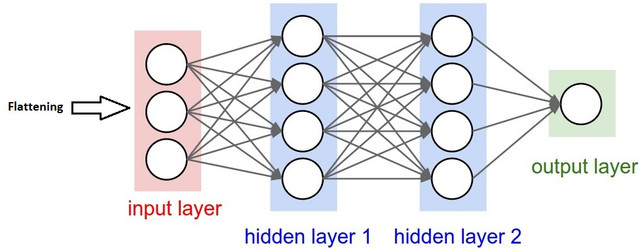

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(filters = 8,  kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (28,28,1)))

In [36]:
model.add(MaxPool2D(pool_size=(2,2)))

In [37]:
model.add(Dropout(0.25))

In [38]:
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

In [39]:
model.add(Flatten())

In [40]:
model.add(Dense(256, activation = "relu"))

In [41]:
model.add(Dropout(0.5))

In [42]:
model.add(Dense(10, activation = "softmax"))

In [43]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [44]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [45]:
epochs = 10
batch_size = 250

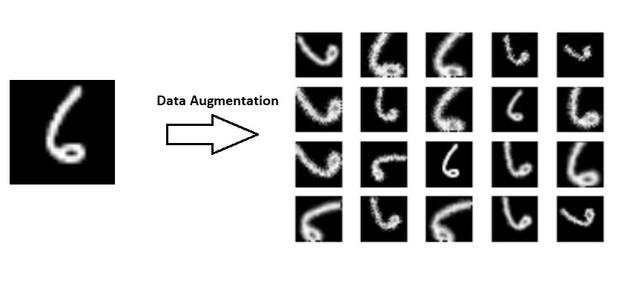

In [46]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [47]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

<ipython-input-47-b15ffa6d981a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


Epoch 1/10
151/151 [==============================] - 34s 191ms/step - loss: 1.1675 - accuracy: 0.6075 - val_loss: 0.2364 - val_accuracy: 0.9364
Epoch 2/10
151/151 [==============================] - 29s 190ms/step - loss: 0.4546 - accuracy: 0.8538 - val_loss: 0.1211 - val_accuracy: 0.9679
Epoch 3/10
151/151 [==============================] - 28s 185ms/step - loss: 0.3164 - accuracy: 0.9009 - val_loss: 0.0943 - val_accuracy: 0.9729
Epoch 4/10
151/151 [==============================] - 28s 186ms/step - loss: 0.2654 - accuracy: 0.9168 - val_loss: 0.0848 - val_accuracy: 0.9752
Epoch 5/10
151/151 [==============================] - 29s 189ms/step - loss: 0.2312 - accuracy: 0.9275 - val_loss: 0.0698 - val_accuracy: 0.9788
Epoch 6/10
151/151 [==============================] - 28s 187ms/step - loss: 0.2054 - accuracy: 0.9366 - val_loss: 0.0680 - val_accuracy: 0.9795
Epoch 7/10
151/151 [==============================] - 28s 188ms/step - loss: 0.1939 - accuracy: 0.9397 - val_loss: 0.0618 - val_ac

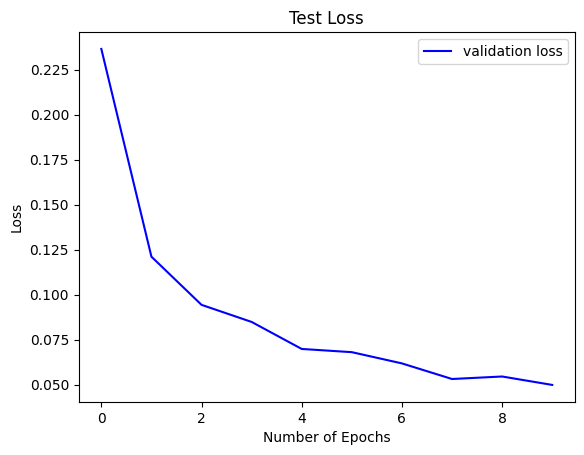

In [48]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 2s 12ms/step


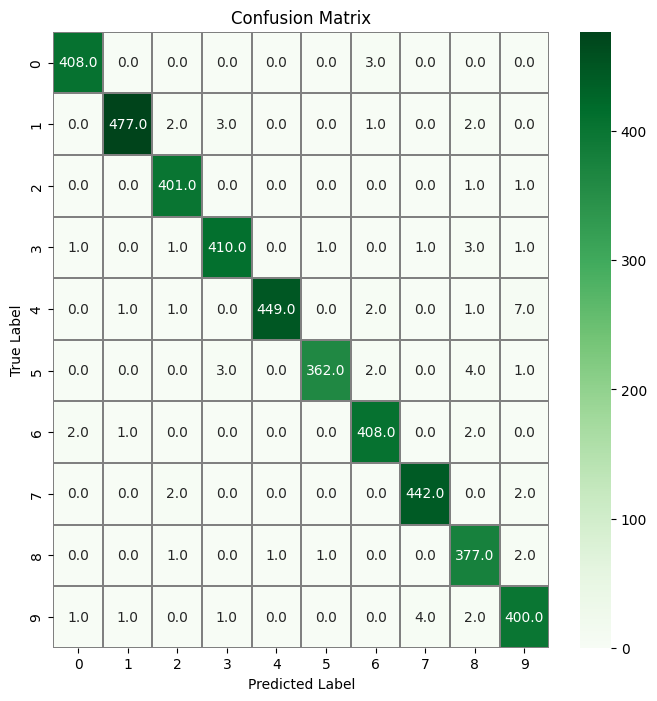

In [49]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()